In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [4]:
df = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
503233,1005523,P00112542,M,36-45,0,B,2,1,1,11.0,15.0,19169
165184,1001508,P00010942,F,0-17,10,C,4+,0,1,2.0,6.0,11775
23895,1003709,P00065442,M,26-35,12,C,3,0,8,16.0,NaN,9987
346906,1005430,P00059142,F,46-50,1,B,1,1,8,14.0,NaN,9913
193626,1005895,P00329242,M,26-35,1,C,4+,0,5,14.0,NaN,6859


In [10]:
df.info(), df.shape, df.isnull().sum(), df.describe(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


(None,
 (550068, 12),
 User_ID                            0
 Product_ID                         0
 Gender                             0
 Age                                0
 Occupation                         0
 City_Category                      0
 Stay_In_Current_City_Years         0
 Marital_Status                     0
 Product_Category_1                 0
 Product_Category_2            173638
 Product_Category_3            383247
 Purchase                           0
 dtype: int64,
             User_ID     Occupation  Marital_Status  Product_Category_1  \
 count  5.500680e+05  550068.000000   550068.000000       550068.000000   
 mean   1.003029e+06       8.076707        0.409653            5.404270   
 std    1.727592e+03       6.522660        0.491770            3.936211   
 min    1.000001e+06       0.000000        0.000000            1.000000   
 25%    1.001516e+06       2.000000        0.000000            1.000000   
 50%    1.003077e+06       7.000000        0.000000      

In [11]:
df.corr(numeric_only=True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [12]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='black_friday.html')

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_32/481985491.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df = df.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'maritial','Stay_In_Current_City_Years':'city'})

In [8]:
df = df.drop(columns=("ProductID"),axis=1)

In [9]:
df

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,C,2,0,20,NaN,NaN,365


In [12]:
df['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
def changeit (value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)

df['city']=df['city'].apply(changeit)

In [16]:
def changeage(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
df['Age']=df['Age'].apply(changeage)

In [22]:
for col in df.columns:
    print(df[col].unique())

[1000001 1000002 1000003 ... 1004113 1005391 1001529]
['F' 'M']
['child' 'old' 'adult' 'teenage']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
[2 4 3 1 0]
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
[ 8370 15200  1422 ...   135   123   613]


In [24]:
s=df.groupby('Age')['product2'].agg(pd.Series.mode)
s

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product2, dtype: float64

In [27]:
for key in s.index:
    df.loc[(df['Age']==key) & (df['product2'].isnull()), 'product2']=s[key]
df['product2'].isnull().sum()

0

In [28]:
p=df.groupby('Age')['product3'].agg(pd.Series.mode)
p

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: product3, dtype: float64

In [29]:
for key in p.index:
    df.loc[(df['Age']==key) & (df['product3'].isnull()), 'product3']=p[key]
df['product3'].isnull().sum()

0

## After cleaning checking the data:-¶


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


## Now that cleaning is done, lets start the EDA

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

## Univariate Analysis

In [51]:
df.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'City_Category', 'city',
       'maritial', 'product1', 'product2', 'product3', 'Purchase'],
      dtype='object')

In [65]:
# df['']
category_counts = df['maritial'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

print(category_percentages)

0    59.034701
1    40.965299
Name: maritial, dtype: float64


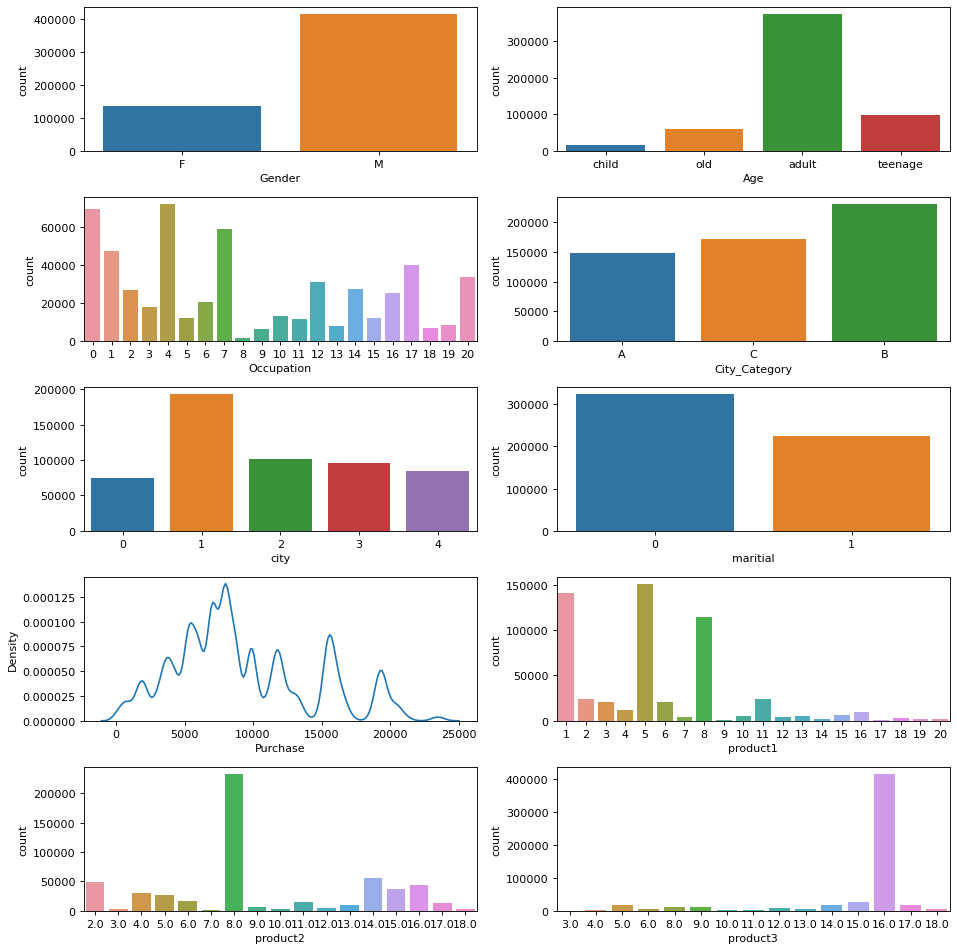

In [67]:
plt.figure(figsize=(12,12),dpi=80)

plt.subplot(5, 2, 1)
sns.countplot(data=df, x="Gender")

plt.subplot(5, 2, 2)
sns.countplot(data=df, x="Age")

plt.subplot(5, 2, 3)
sns.countplot(data=df, x="Occupation")

plt.subplot(5, 2, 4)
sns.countplot(data=df, x="City_Category")

plt.subplot(5, 2, 5)
sns.countplot(data=df, x="city")

plt.subplot(5, 2, 6)
sns.countplot(data=df, x="maritial")

plt.subplot(5, 2, 7)
sns.kdeplot(data=df, x="Purchase")

plt.subplot(5, 2, 8)
sns.countplot(data=df, x="product1")

plt.subplot(5, 2, 9)
sns.countplot(data=df, x="product2")

plt.subplot(5, 2, 10)
sns.countplot(data=df, x="product3")

plt.tight_layout()
plt.show()

Gender - Male dominant <br>
Age - Mostly adult <br>
Occupation - 0,1,4,7 are high numbers <br>
City_cat - Most people are from 'B' city_cat <br>
city - Most are from 1 no. city <br>
Martial - Unmarried are dominant <br>
Purchase - Cheaper prodcuts are more purchased, expensive are being purchased <br>


## Bivariate and Multivariate Analysis

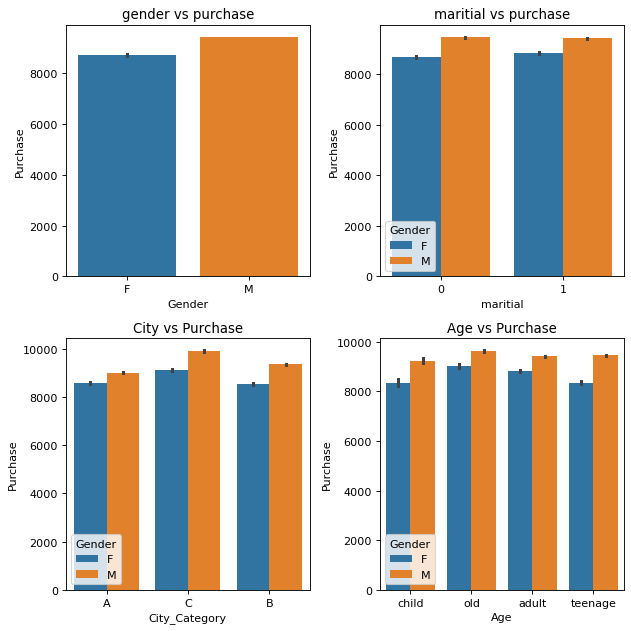

In [70]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=df)

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(data=df,x='maritial',y='Purchase',hue='Gender')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=df,x='City_Category',y='Purchase',hue='Gender')

plt.subplot(2,2,4)
plt.title('Age vs Purchase')
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender')

plt.tight_layout()
plt.show()

1. Male has slightly more purchase power <br>
2. Married and Non-Married bot has equal purchase power <br>
3. Most purchase is from Male of City cat C, least is from females of city cat B <br>
4. Purchase power is highest in old people, least in child <br>

 <br>
From all we can conclude, Male has more purchase power than female

<Axes: ylabel='Age'>

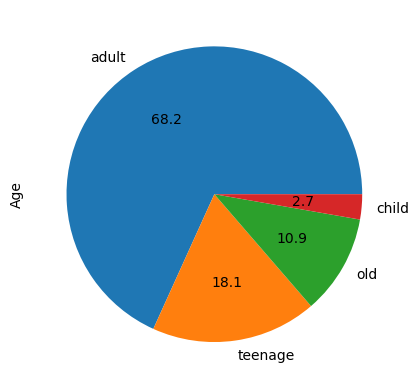

In [71]:
df['Age'].value_counts().plot(kind='pie',autopct='%.1f')

Most people in stores are adults

<Axes: ylabel='City_Category'>

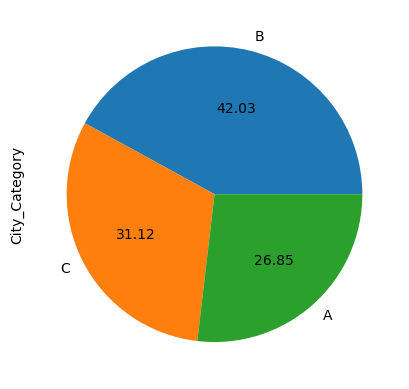

In [73]:
df['City_Category'].value_counts().plot(kind='pie',autopct='%.2f')

B cit_cat is mostly visited

<Axes: xlabel='Purchase', ylabel='Density'>

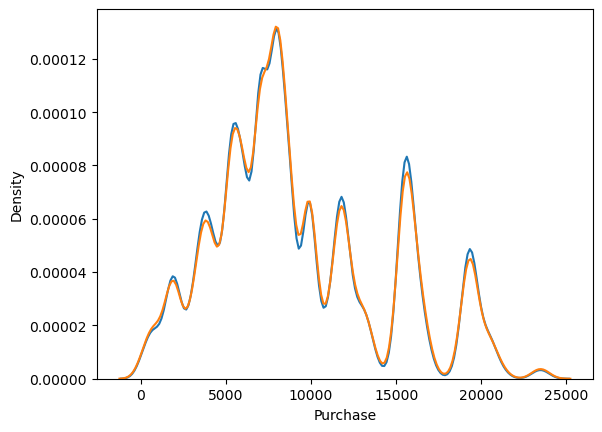

In [74]:
sns.kdeplot(df[df['maritial'] == 0]['Purchase'])
sns.kdeplot(df[df['maritial'] == 1]['Purchase'])

Puchase power of Married and Unmarried is the same

<Axes: xlabel='Purchase', ylabel='Density'>

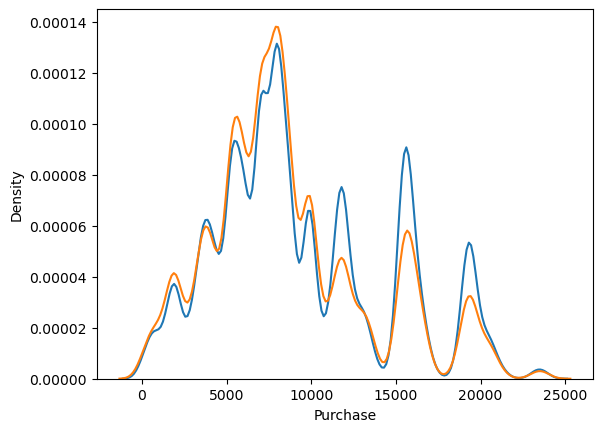

In [79]:
sns.kdeplot(df[df['Gender'] == "M"]['Purchase']) #blue line
sns.kdeplot(df[df['Gender'] == "F"]['Purchase'])

on cheap products females are slightly higher purchase <br>
on expensive products, male are dominant in purchase power

<h3>Thanks you so much all for giving this a watch, this was my first EDA on my own on a random dataset I picked, wish me luck, some code of this were reffered by this </h3>

This notebook I reffered while making. [link](https://www.kaggle.com/code/sanskrutikunjir/black-friday-eda-sanskruti-kunjir#Data-visualization)